<a href="https://colab.research.google.com/github/engosoro/Mall-Customers-Segmentation-Model/blob/main/Mall_Customers_Segmentation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# First, I inspected the columns in the dataset.
df.head()
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [74]:
# I selected the features I'll cluster on. 'Annual income' and 'Spending score'.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [75]:
# I used standardscaler to scale the data which is crucial for K-means.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


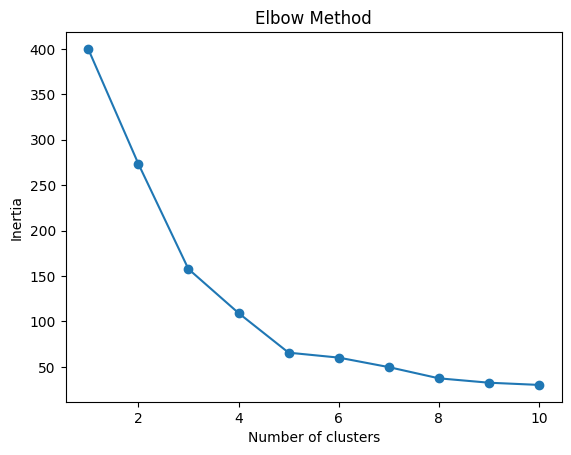

In [76]:
# I then used the elbow method to decide on the number of clusters that I'll use.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [77]:
# And now I fitted K-means with the number of clusters(5).
kmeans = KMeans(n_clusters=5, random_state=42)


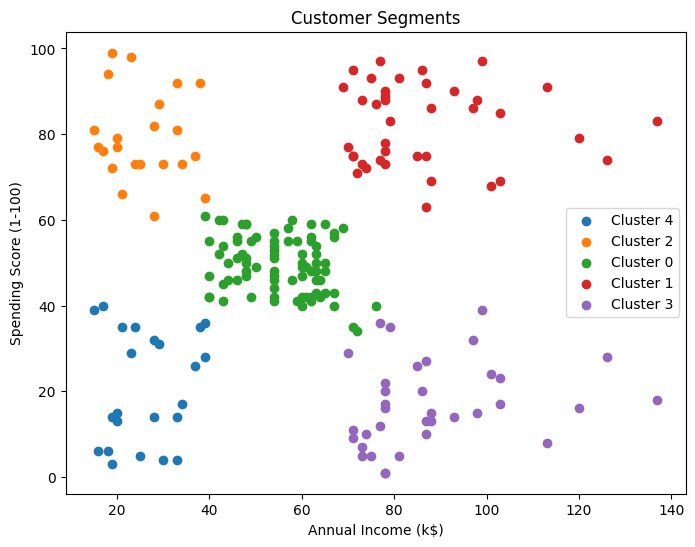

In [78]:
# And there is my beautiful viualization of the customer clusters based on their income and spending score.
plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    plt.scatter(
        df.loc[df.Cluster==cluster, 'Annual Income (k$)'],
        df.loc[df.Cluster==cluster, 'Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()


<Axes: xlabel='Cluster', ylabel='Annual Income (k$)'>

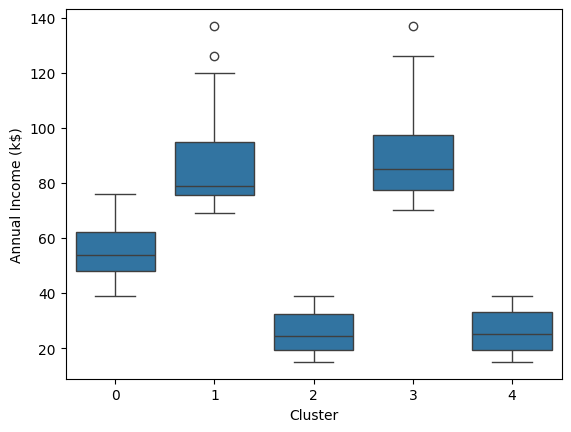

In [79]:
# I tried to find the average income & spending per cluster
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# And then I used boxplots to see the spread inside each group
import seaborn as sns
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)


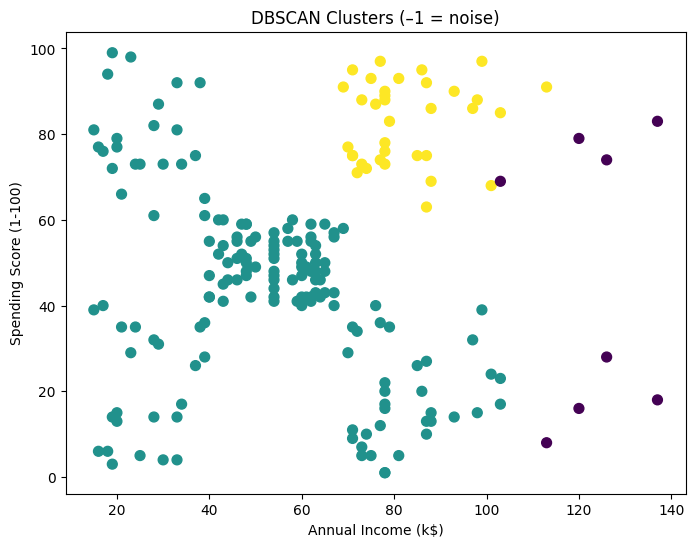

In [80]:
# Trying DBSCAN algorithm.
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df['DBSCAN'] = labels

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clusters (–1 = noise)')
plt.show()


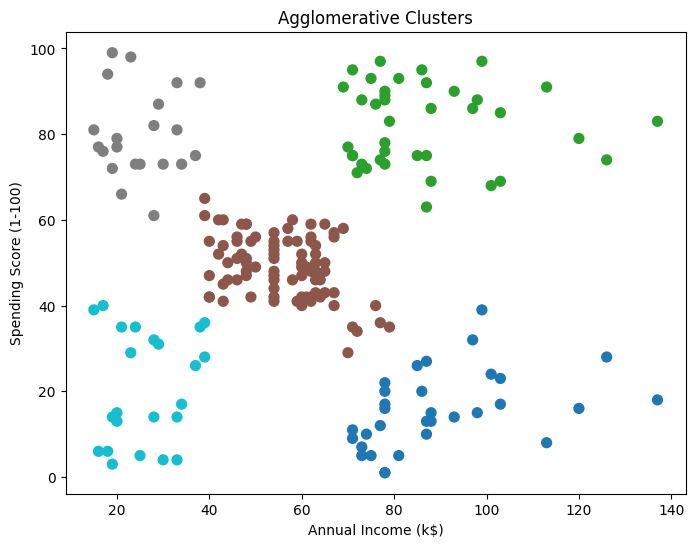

In [81]:
# Now, I'm trying Agglomerative clustering.
from sklearn.cluster import AgglomerativeClustering

# Here, I'm choosing the number of clusters.
agg = AgglomerativeClustering(n_clusters=5)
df['Agglo'] = agg.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Agglo'], cmap='tab10', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clusters')
plt.show()


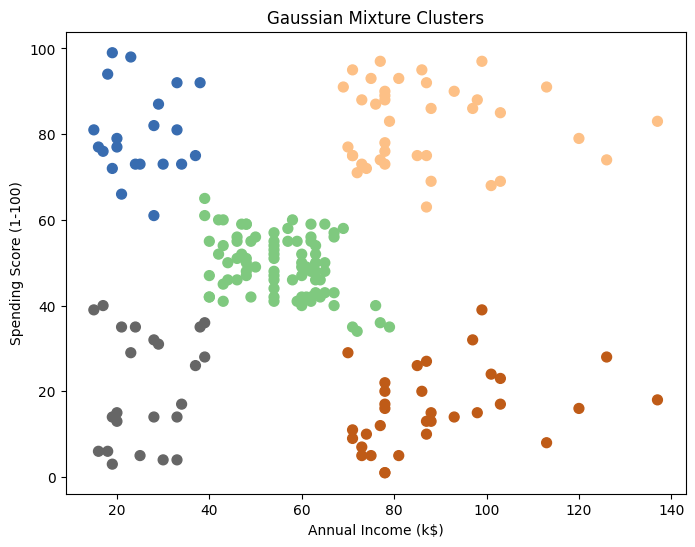

In [82]:
# Lastly, I tried Gaussian mixture model.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['GMM'] = gmm_labels

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['GMM'], cmap='Accent', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Gaussian Mixture Clusters')
plt.show()


In [83]:
# Lastly, I compared the results from each algorithm.
df[['Cluster','DBSCAN','Agglo','GMM']].head()
df[['Cluster','DBSCAN','Agglo','GMM']].value_counts()


Cluster  DBSCAN  Agglo  GMM
0         0      2      0      81
1         1      1      1      35
3         0      0      3      28
4         0      4      4      23
2         0      3      2      21
1        -1      1      1       4
3        -1      0      3       4
          0      2      0       2
2         0      2      0       1
3         0      2      3       1
Name: count, dtype: int64